# Washington DC Dataset
# http://www.buildsmartdc.com/buildings

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [3]:
from_file_path = "../data/raw/DGS_322_Buildings-15m-By_Building-DST-gap-filled-3-2-18-508pm.csv"
to_file_path   = "../data/processed/dgs_energy_data.csv"
to_file_path1  = "../data/processed/dgs_energy_data_filtered.csv"
to_file_path2  = "../data/processed/dgs_energy_data_cleaned.csv"

In [4]:
dgs = pd.read_csv(from_file_path)
dgs.head(5)

C:\Users\sbbpan\AppData\Local\Continuum\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2714: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,

,Building ID,Unnamed: 1,Unnamed: 2,1,3,4,6,7,8,9,...,531,539,608,610,612,613,614,620,623,626
0,Building,NaN,NaN,1st District Headquarters,Impound Lot #1 & Fleet Fueling Site,Jefferson Playing Fields,DC Village,200 I Street Municipal Building,C.W. Harris Elementary School,Nalle Elementary School,...,Shepard Park Library,Spring Road Community Support Services,Van Ness Elementary School,Warehouse/Office,Washington Seniors Wellness Center,Waterfront Municipal Center East,Waterfront Municipal Center West,Winston Educational Center,H.D. Woodson High School,Youth Services Administration #3
1,Billing Account,NaN,NaN,55021032705,55021054519,55021079185,55018043012|55021464403|55023678737,55015957578|55015957958|55016692315|5501669266...,55021219245,55021218759,...,55017360987,55019683311,55021273929,55016495362,55016014536,55023140803|55023141199|55023141470,55015525243|55023114048|55023114519,55021512854,55013360593|55013428291,50002972367|55012709600|55012730143|5501273061...
2,Date,Time,Temperature (F),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2/2/2016,0:15,43,32.65,0.05,0,38.66,270.9,11.64,34.58,...,8.62,6.79,8.38,9.48,2.88,76.92,98.54,56.36,67.1,10.94
4,2/2/2016,0:30,43,32.46,0.05,0,37.53,280.75,11.69,33.64,...,8.65,6.8,8.36,10.72,3.78,76.4,100.91,55.43,63.87,10.77


In [5]:
# drop the metadata rows (building name and billing account) 
dgs.drop(dgs.head(3).index, inplace=True)

# set timestamp and temperature
dt = dgs.iloc[:,0].astype(str) + ' '  + dgs.iloc[:,1].astype(str)
dgs['timestamp'] = pd.to_datetime(dt, format='%d/%m/%Y %H:%M')
dgs.set_index('timestamp', inplace=True)
dgs.drop(dgs.columns[[0,1,2]], inplace=True, axis=1)
dgs = dgs.astype(float)
#dgs.dtypes
dgs.head(5)

,1,3,4,6,7,8,9,11,13,14,...,531,539,608,610,612,613,614,620,623,626
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-02-02 00:15:00,32.65,0.05,0.0,38.66,270.90,11.64,34.58,9.36,12.49,8.48,...,8.62,6.79,8.38,9.48,2.88,76.92,98.54,56.36,67.10,10.94
2016-02-02 00:30:00,32.46,0.05,0.0,37.53,280.75,11.69,33.64,10.67,12.20,10.11,...,8.65,6.80,8.36,10.72,3.78,76.40,100.91,55.43,63.87,10.77
2016-02-02 00:45:00,33.82,0.05,0.0,40.25,290.58,11.56,34.18,9.37,12.22,10.16,...,8.63,6.83,8.31,10.82,2.09,75.66,98.58,57.30,65.13,10.66
2016-02-02 01:00:00,32.25,0.05,0.0,41.28,279.57,11.67,34.06,8.53,12.37,8.44,...,8.70,6.94,8.37,11.90,2.64,75.07,94.92,56.84,65.39,10.52
2016-02-02 01:15:00,33.00,0.05,0.0,41.08,277.53,11.56,34.18,9.72,12.50,10.05,...,8.68,6.74,8.43,11.92,3.90,74.76,95.21,56.18,65.52,10.49


In [6]:
#dgs.to_csv(to_file_path, float_format='%.02f')
dgs_1hr = dgs.resample('1H').sum()
#dgs_1d = dgs.resample('1D').mean()
dgs_1hr.to_csv(to_file_path, float_format='%.02f')
dgs_1hr.head()

,1,3,4,6,7,8,9,11,13,14,...,531,539,608,610,612,613,614,620,623,626
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-02-02 00:00:00,98.93,0.15,0.0,116.44,842.23,34.89,102.40,29.40,36.91,28.75,...,25.90,20.42,25.05,31.02,8.75,228.98,298.03,169.09,196.10,32.37
2016-02-02 01:00:00,132.86,0.20,0.0,163.86,1076.64,46.85,136.54,38.80,49.27,37.02,...,34.67,27.43,33.91,47.71,13.33,298.96,385.03,225.58,266.56,41.68
2016-02-02 02:00:00,128.04,0.20,0.0,159.58,1073.00,46.66,134.55,39.58,49.61,38.57,...,34.68,27.26,33.41,47.78,12.81,276.49,380.20,227.21,294.55,41.12
2016-02-02 03:00:00,128.30,0.20,0.0,167.21,1060.78,45.48,133.85,43.00,49.80,38.50,...,34.85,27.15,33.47,47.63,13.55,264.61,388.97,225.65,312.88,41.11
2016-02-02 04:00:00,130.96,0.20,0.0,166.73,1128.63,46.34,135.02,41.03,49.17,36.81,...,34.48,27.15,33.66,51.21,13.41,270.80,382.17,227.11,332.30,45.44


In [61]:
def plot_heatmap(df):
    plt_height = 1 + len(df.columns) * 0.3
    fig, ax = plt.subplots(figsize=(20,plt_height))         # Sample figsize in inches
    ax = sns.heatmap(df.transpose(), cmap = sns.diverging_palette(220, 10, as_cmap=True))
    ax.set_xticklabels([i.strftime("%Y-%m-%d %H") for i in df.index])
    plt.show()

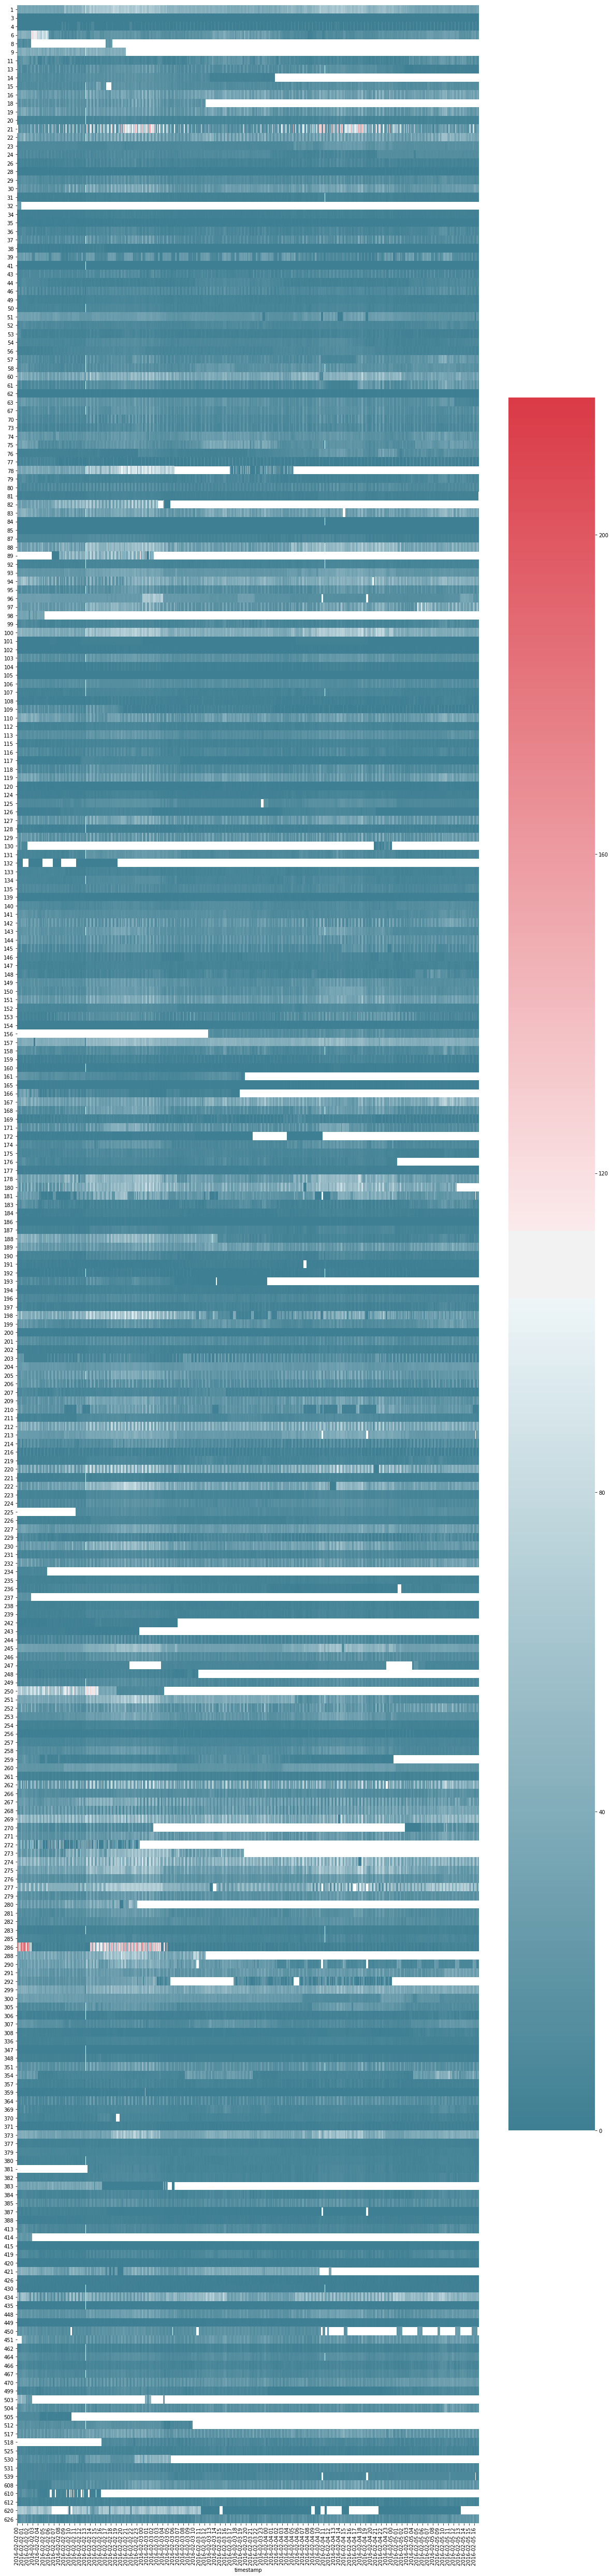

In [62]:
# plot heatmpa of those buildings with avg energy usaage is less than N
a = dgs_1hr.mean() < 50
a = a[a == True]
df1 = dgs_1hr[a.index.tolist()]
#df1.head()
#a.index.tolist()
plot_heatmap(df1)

In [67]:
# removing buildings with less no of data
nrows = len(dgs_1hr.index)
filtered = dgs_1hr.isnull().sum() < nrows *.10
dgs_1hr_filtered = dgs_1hr[dgs_1hr.columns[filtered]]
dgs_1hr_filtered.to_csv(to_file_path1, float_format='%.02f')

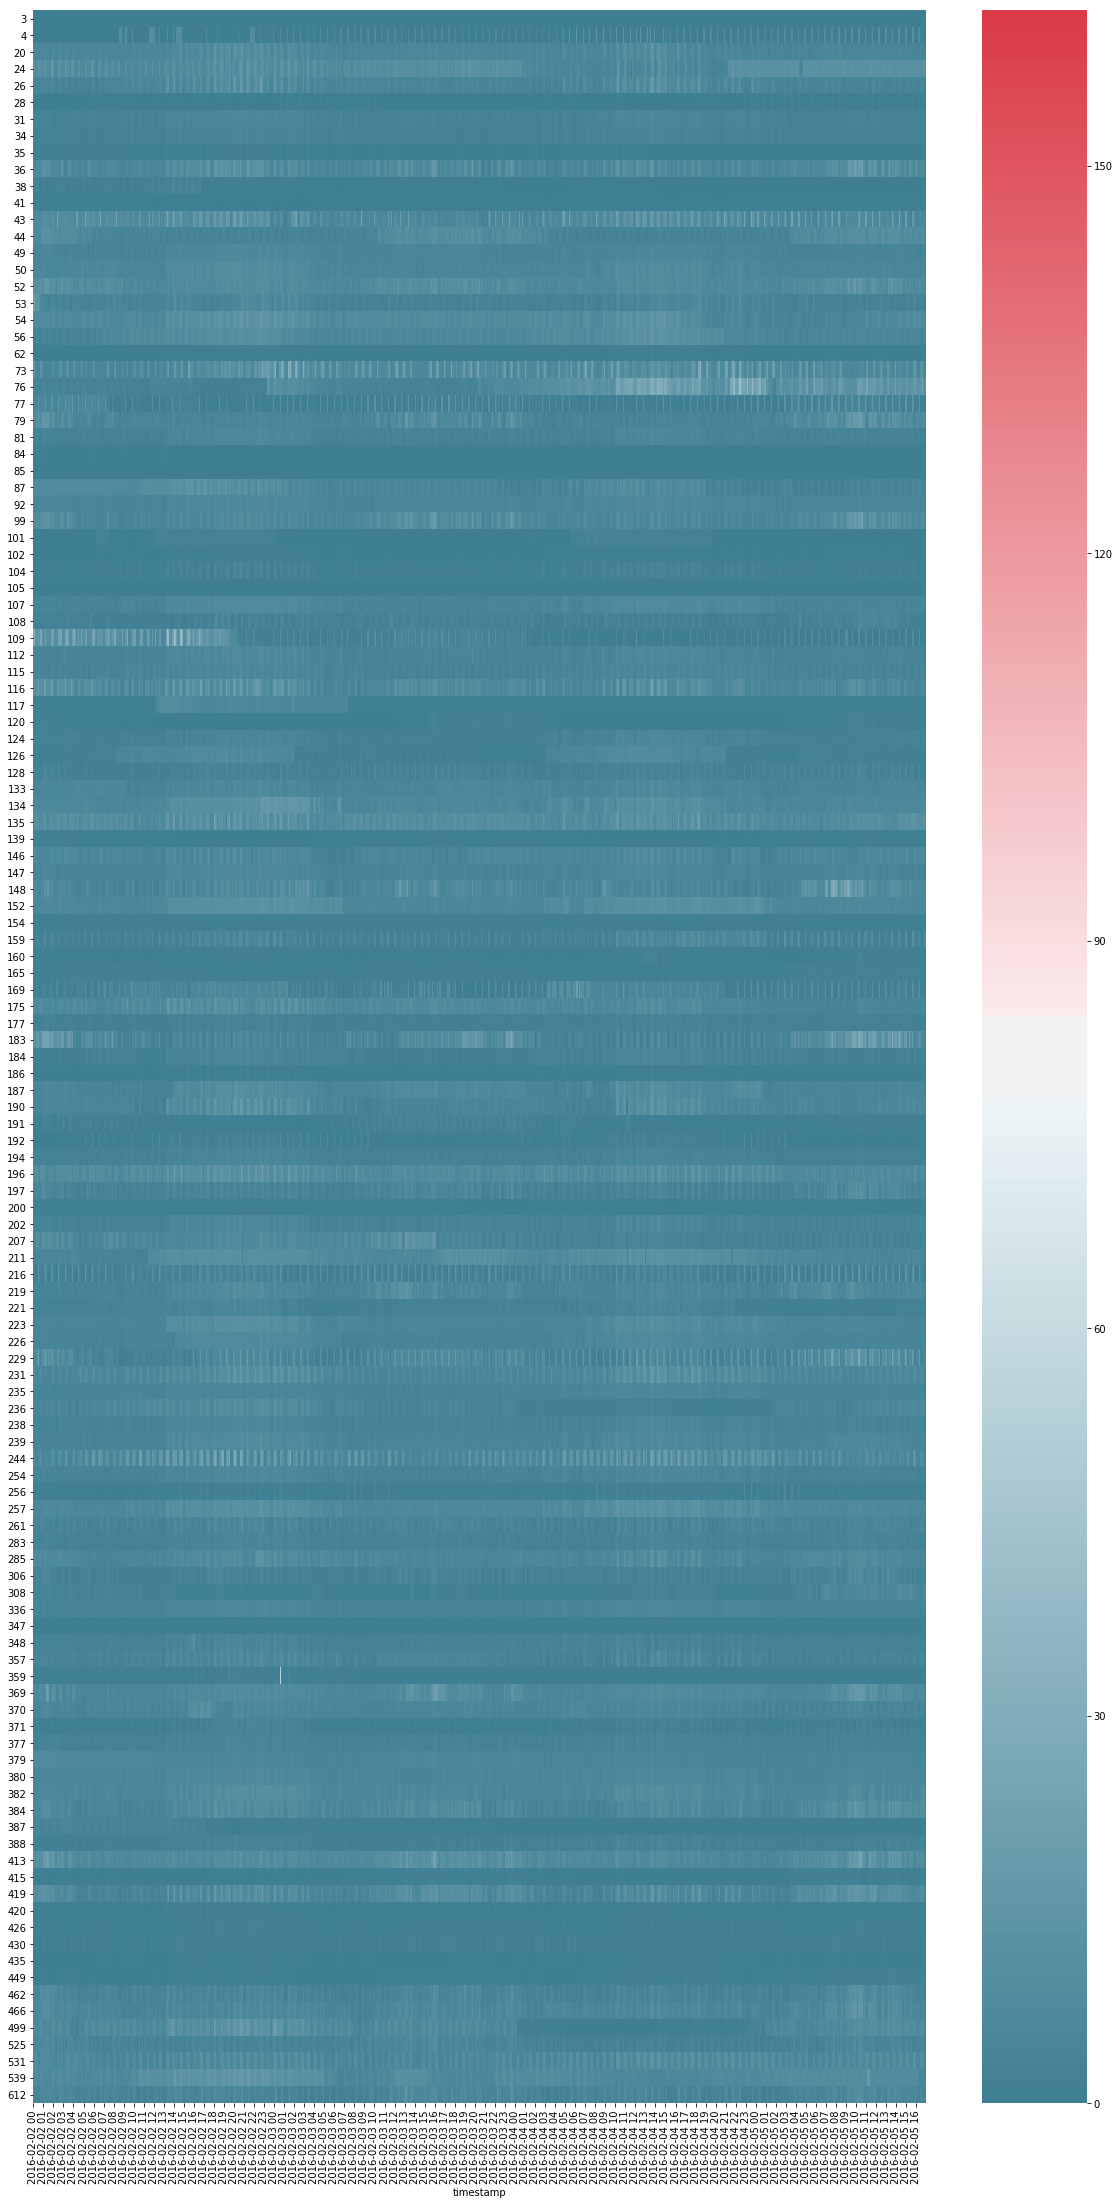

In [63]:
# plot heatmpa of those buildings with avg energy usaage is less than N
a = dgs_1hr_filtered.mean() < 10
a = a[a == True]
df1 = dgs_1hr_filtered[a.index.tolist()]
#df1.head()
#a.index.tolist()
plot_heatmap(df1)

In [64]:
# fill missing values
#TODO: need to try different methods for filling missing values
dgs_1hr_cleaned = dgs_1hr_filtered.interpolate()
dgs_1hr_cleaned.to_csv(to_file_path2, float_format='%.02f')

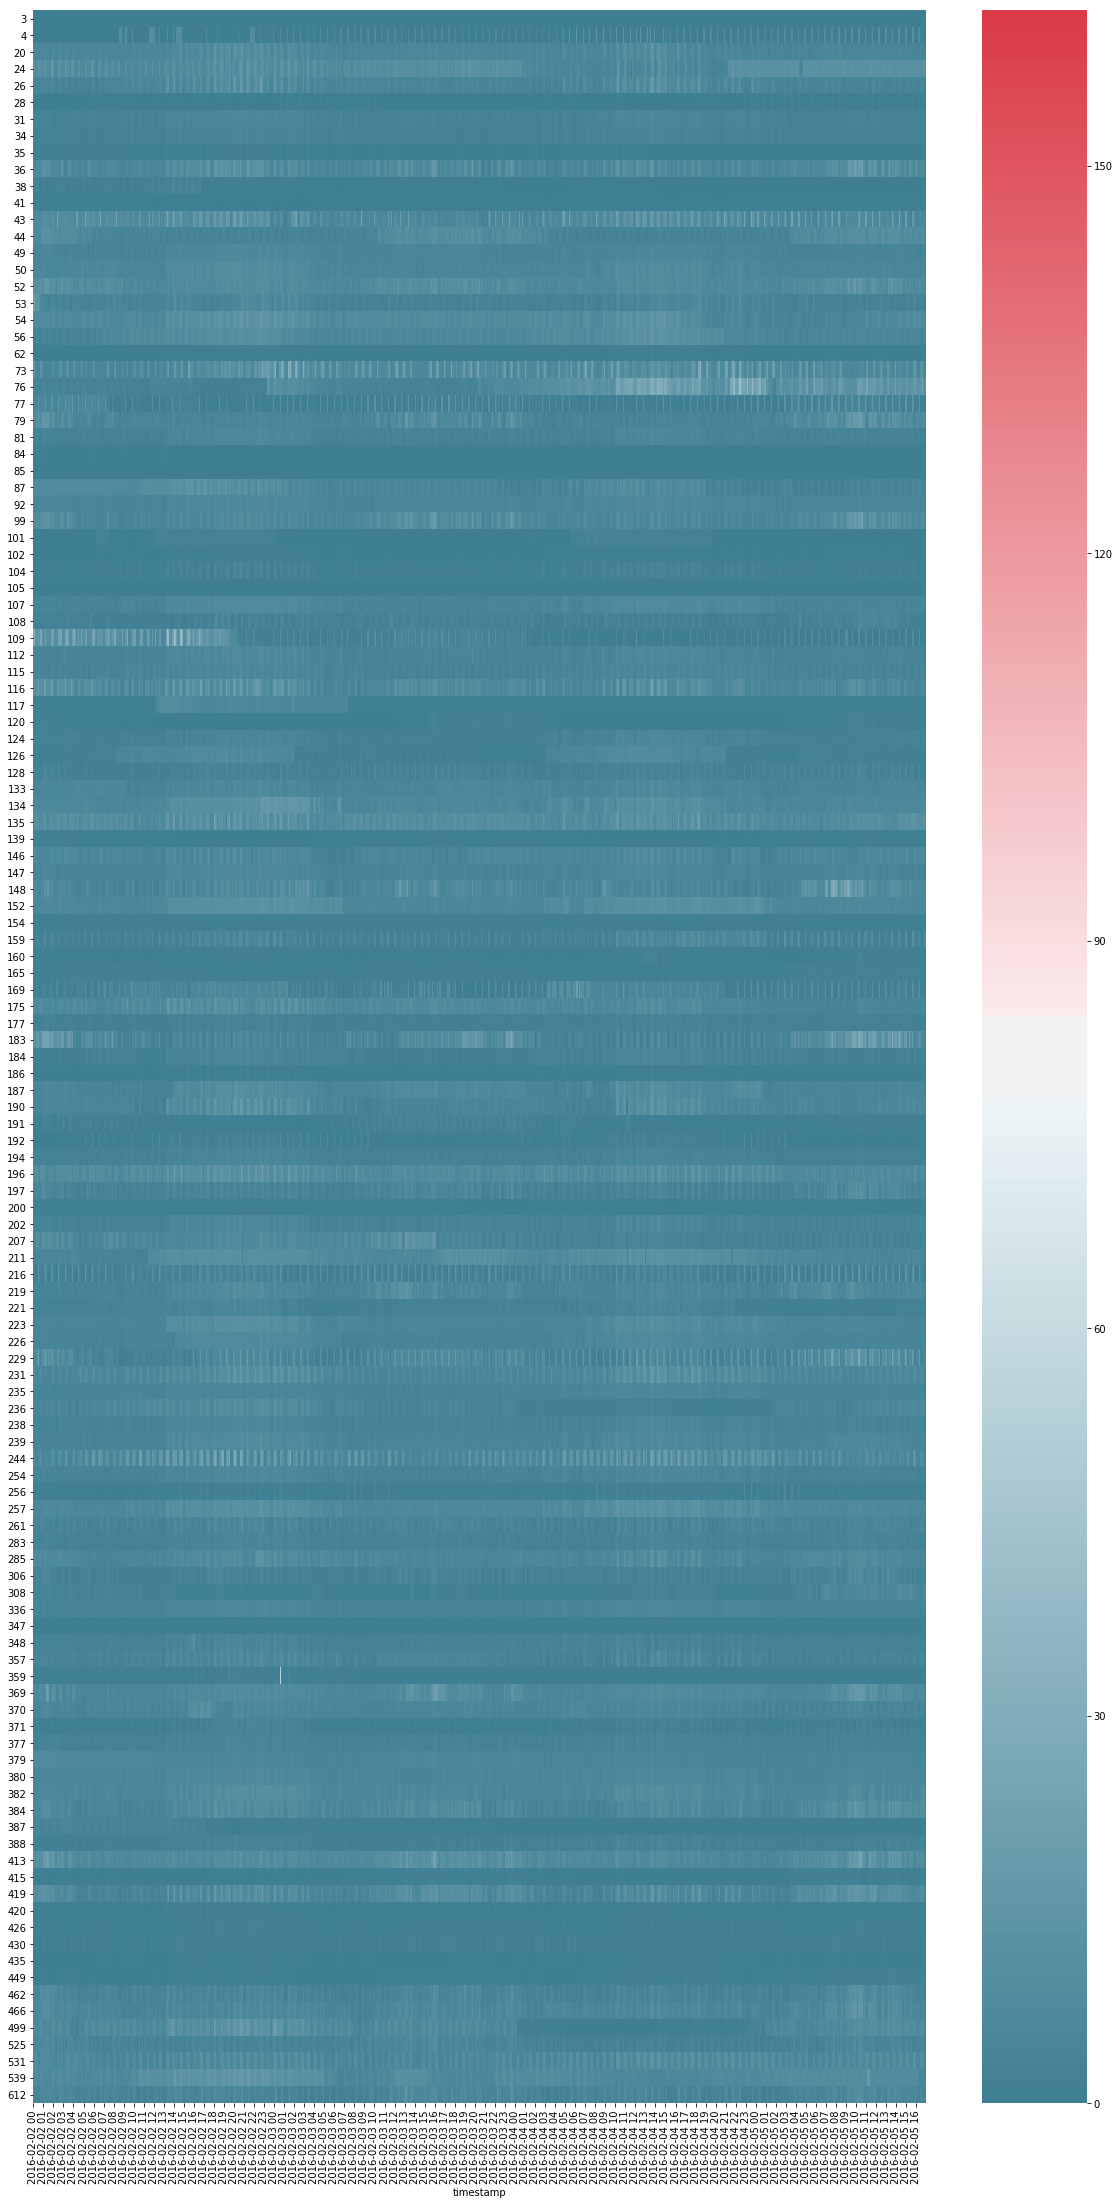

In [66]:
# plot heatmpa of those buildings with avg energy usaage is less than N
a = dgs_1hr_cleaned.mean() < 10
a = a[a == True]
df1 = dgs_1hr_cleaned[a.index.tolist()]
#df1.head()
#a.index.tolist()
plot_heatmap(df1)